# Welcome to Introduction to python
**V.0.1 - Alpha testing, [contributions](#contributions)**

Congratulations, if you are viewing this Jupyter notebook, you have already acquired many of the skills necessary to excel in this course and you are well on your way to learning cutting-edge methods for cognitive neuroscience!

In this course we will use a variety of tools, many of which will likely be new to you. Don't worry if you are having trouble wrapping your head around them now: by the end of this course you will be an expert in not only these useful skills but also the exciting methods that use them. 

## Goal of this script
    1. Familiarize yourself with the tools that will be used in these notebooks 


## Table of Contents
[1. GitHub](#git)  

[2. Jupyter](#jupyter)  

[3. Python](#python)  

[4. Brainiak](#brainiak)  

Exercises
>[Exercise 1](#ex1)  

## 0. General resources <a id="jupyter"></a>

Here're some resources for python, fMRI and intro machine learning: 
<a href="https://github.com/NEU480/organization/wiki/resources">NEU480 wiki resource page</a>

## 1. GitHub<a id="git"></a>

To be looking at this notebook means you must have forayed into GitHub. It is a version control system that allows you to manage code and is the standard when working with others and sharing code broadly.

GitHub can be scary, especially given that a lot of the language used to explain it and its goals can be unfamilar. Googling 'github for beginners' usually assumes a level of knowledge that many don't have. A good step zero for understanding git is found here (sorry to those reading this in the year 2099, where cars are just mobile movie theatres and soylent is the norm, this link and others will likely be broken): https://readwrite.com/2013/09/30/understanding-github-a-journey-for-beginners-part-1/. Another useful way to get familiar with the basics of GitHub is by doing this small tutorial: https://guides.github.com/activities/hello-world/.

**Some additional things you should be aware of:**

*It is hard to break git:* because git is a version control system, most of the time you will have backups of everything you do. It is actually very hard to delete what you have done. That leads to...

*It is easy to tangle up a git:* if you are collaborating with others, or you have two systems with a single git repository (a.k.a. 'repo'), to avoid headaches later make sure that a repo is up to date before you make edits.

*Commit often:* This is a cardinal rule, do it to avoid the above. Note that this is in addition to locally checkpointing your code within Jupyter, which you should do even more often (save button or keyboard shortcut)

*Don't put data on there!* This is very important. Firstly, a lot of fMRI data ought to be HIPAA-protected and github is not secure. Moreover, you shouldn't store more than 100Mb in a repo (less than 1Gb is allowed, but it makes things really slow).


## 2. Jupyter<a id="jupyter"></a>

Jupyter notebook is a convenient GUI for running simple code and visualizing results. Jupyter is not an ideal place to learn a new language like Python since it won't provide a lot of the helpful nudges that coding environments like PyCharm (https://www.jetbrains.com/pycharm/) or Spyder (https://pythonhosted.org/spyder/) does, but it is a perfect tool to distribute results once you have some python expertise

A great demo for Jupyter is here:
https://www.youtube.com/watch?v=HW29067qVWk

Although most of your experience with jupyter will be using a python kernel, you can actually use jupyter for multiple languages, like [R](https://github.com/IRkernel/IRkernel) or [matlab](https://github.com/Calysto/matlab_kernel).

## 3. Python<a id="python"></a>

Over recent years you have probably heard many people tell you to shift to Python. Python boasts a number of benefits: it is open source, it is free, it has been developed extensively for machine learning, it is free, it is open source, it is free and it is free. There are still some drawbacks which mean that you might not want to switch everything you do to python but for advanced neuroimaging, it is what all the cool kids are doing at the moment. 

Learning to code in Python is moderately difficult: sometimes the syntax is demanding but it has a ton of support, tutorials, and online courses.

Here is one from a BrainIAK hackathon: https://github.com/brainiak/hackathon

When learning a language you should try learn the conventions at the same time. [PEP8](https://www.python.org/dev/peps/pep-0008/) is a standard convention system in Python.

This notebook uses the following additional packages for Python: 
- <a href="http://www.numpy.org/">numpy</a>: for scientific computing
- <a href="https://matplotlib.org/">matplotlib</a>: for plotting

You should read more about these packages and their available functions and capabilities. 

## 4. BrainIAK<a id="jupyter"></a>

The Brain Imaging Analysis Kit ([BrainIAK](http://brainiak.org/)) is a freshly developed, open source toolbox coming out of a collaboration between computer scientists and neuroscientists. It uses recent advances in machine learning and high-performance parallel computing to bring analyses that might have previously taken months down to seconds. BrainIAK contains a number of advanced tools that cannot be found anywhere else. We will cover these tools extensively so that by the end of the course you will be conducting some of the most sophisticated fMRI analyses currently possible.

A good introduction to BrainIAK comes from a recent Nature Neuroscience review:

Cohen, J.D., Daw, N., Engelhardt, B., Hasson, U., Li, K., Niv, Y., Norman, K.A., Pillow, J., Ramadge, P.J., Turk-Browne, N.B. and Willke, T.L., (2017). Computational approaches to fMRI analysis. *Nature Neuroscience, 20(3)*, 304-313.

In [9]:
# suppress warnings
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# get a helper function for loading MNI152 template 
from qutils import get_MNI152_template

# The plotting tool we will be using in this course
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style = 'white', context='poster', rc={"lines.linewidth": 2.5})

# Module essential for data organization and manipulation
import numpy as np #numpy's "nickname" is np

# display the plots inline 
%matplotlib inline 
# autosave for every 5 secs
%autosave 5

Autosaving every 5 seconds


In [10]:
# Set the size of the volume we want to create
dim_x, dim_y, dim_z = 64, 64, 64
# use brainiak.fmrisim to load MNI152 brain template
MNI_152_template = get_MNI152_template(dim_x, dim_y, dim_z)

### brain template 

You just used a function called `get_MNI152_template`. Internally, `get_MNI152_template` is calling a function from `brainiak` to load the MNI152 brain template. Here's an article talking about different brain templates, including MNI152: <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4324755/">Structural Brain Atlases: Design, Rationale, and Applications in Normal and Pathological Cohorts</a>

Run the following code to visualize the brain template! 

In [3]:
# get a transverse slice halfway through the brain
mid_idx = int(dim_z / 2)
horizontal_slice = MNI_152_template[:, :, mid_idx]

print(horizontal_slice)

[[1.02354718e-32 8.39959292e-30 1.98325769e-28 ... 0.00000000e+00
  0.00000000e+00 7.75093213e-44]
 [4.75328509e-30 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.13768727e-43]
 [0.00000000e+00 2.13011269e-27 5.02620057e-26 ... 2.48067020e-25
  1.05068623e-26 3.02680468e-43]
 ...
 [7.21719594e-29 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 8.48135896e-43]
 [0.00000000e+00 1.91005780e-27 4.50823040e-26 ... 4.18952289e-26
  1.77446967e-27 0.00000000e+00]
 [1.02415212e-44 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.97057597e-46]]


Text(0.5,1,'A horizontal brain slice')

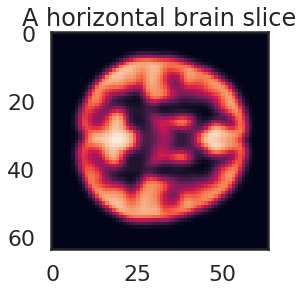

In [4]:
# imshow can visualize a 2d array (a table of numbers)
plt.imshow(horizontal_slice)
plt.title('A horizontal brain slice')

### "help()"

`help` is a very useful function in python. If you type `help(function_name)` in python, you will get some basic infomation about how to use this function. If you run the following line, you will see that `get_MNI152_template` take the dimension of x, y, and z, and then output a MNI152 template with the specified dimensions. 

In [5]:
help(get_MNI152_template)

Help on function get_MNI152_template in module qutils:

get_MNI152_template(dim_x, dim_y, dim_z)
    get MNI152 template used in fmrisim
    Parameters
    ----------
    dim_x: int
    dim_y: int
    dim_z: int
        - dims set the size of the volume we want to create
    
    Returns
    -------
    MNI_152_template: 3d array (dim_x, dim_y, dim_z)



### look at the source code
If you want to see the source code, you can use the `getsource` function from the `inspect` package. 

Run the following code to see the source code of `get_MNI152_template`. 

In [6]:
import inspect
# this "inspect" package can let you peek what's inside a function
source_code = inspect.getsource(get_MNI152_template)
print(source_code)

def get_MNI152_template(dim_x, dim_y, dim_z):
    """get MNI152 template used in fmrisim
    Parameters
    ----------
    dim_x: int
    dim_y: int
    dim_z: int
        - dims set the size of the volume we want to create
    
    Returns
    -------
    MNI_152_template: 3d array (dim_x, dim_y, dim_z)
    """
    # Import the fmrisim from BrainIAK
    import brainiak.utils.fmrisim as sim 
    # Make a grey matter mask into a 3d volume of a given size
    dimensions = np.asarray([dim_x, dim_y, dim_z])
    _, MNI_152_template = sim.mask_brain(dimensions)
    return MNI_152_template



#### "python function"

`get_MNI152_template` is a python "function" we wrote. In general, a python function has the following structure: 

    def function_name(input_1, input_2, ..., input_m):
        some code 
        some code
        ...
        some code
        return output1, output2, ... output_n

**Exercise 1:**<a id="ex1"></a> Change the above script in at least 3 ways (examples: add a subplot of different slices, change the colors, show a histogram of values, etc.):

Text(0.5,1,'rotated image')

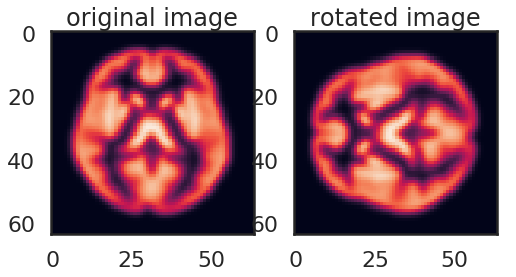

In [12]:
"""here's a function that can rotate the image"""

from scipy import ndimage

horizontal_slice_rotated = ndimage.interpolation.rotate(horizontal_slice, angle = 90)

# plot them 
f, axes = plt.subplots(1,2,figsize=(8,4))
axes[0].imshow(horizontal_slice)
axes[0].set_title('original image')

axes[1].imshow(horizontal_slice_rotated)
axes[1].set_title('rotated image')

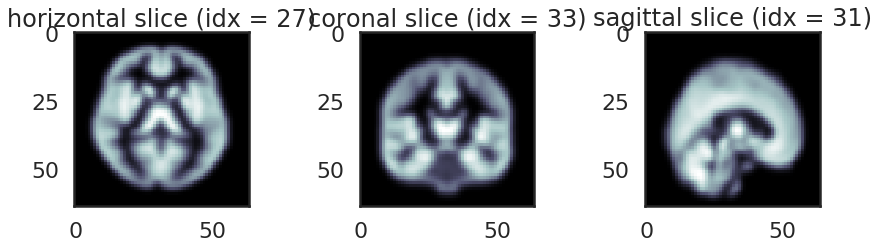

In [11]:
"""example solution: plot xyz slices"""

from scipy import ndimage

# get 3 mid slices
x_idx = 27
y_idx = 33
z_idx = 31
horizontal_slice = MNI_152_template[:, :, x_idx]
coronal_slice = MNI_152_template[:, y_idx, :]
sagittal_slice = MNI_152_template[z_idx, :, :]

# rotate the images by 90 degree, counter-clockwise 
horizontal_slice = ndimage.interpolation.rotate(horizontal_slice, angle = 90)
coronal_slice = ndimage.interpolation.rotate(coronal_slice, angle = 90)
sagittal_slice = ndimage.interpolation.rotate(sagittal_slice, angle = 90)

# plot them 
f, axes = plt.subplots(1,3,figsize=(12,4))
axes[0].imshow(horizontal_slice, cmap='bone')
axes[0].set_title('horizontal slice (idx = %d)' % (x_idx))

axes[1].imshow(coronal_slice, cmap='bone')
axes[1].set_title('coronal slice (idx = %d)' % (y_idx))

axes[2].imshow(sagittal_slice, cmap='bone')
axes[2].set_title('sagittal slice (idx = %d)' % (z_idx))

f.tight_layout()

## Contributions<a id="contributions"></a>
  
M. Kumar, C. Ellis and N. Turk-Browne produced the initial notebook  
T. Meissner minor edits  
Q. Lu: switch to matplotlib, fix dead links, add resources, encapsulate brainiak fmrisim  